<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/Travel_aggregator_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Travel Aggregator Analysis
 "Travelling has significantly changed thanks to technology. In the earlier days, it was not
easy to travel as booking journeys used to be a hassle, where people needed to contact
travel agents, get prices and then do a lot of paperwork.
But, with the advent of online apps, it becomes easier to book tickets. However, one
challenge is still there. Due to many available apps which offer bookings, there can be a lot
of comparisons for getting the best price.
A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top
platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming
journeys on its platform and the customer is redirected to the desired platform after
looking at the price.
However, they need to do a lot of analysis of the data which they have collected over a
while.
As a newly hired analyst and proficiency in Python, your role is to help them perform an indepth analysis."

Q.1 Find the number of distinct bookings, sessions, and searches from the given data sets

In [ ]:
#To find the number of distinct bookings, sessions, and searches using Python with pandas, you'll need to read both CSV files and use the nunique() method.
import pandas as pd

# Load CSVs
df_bookings = pd.read_csv('Bookings.csv')

df_sessions = pd.read_csv('Sessions.csv')
#df_sessions.head()

#number fo distinct bookings
# printing the unique values present in the booking column
print("Printing the unique values present in the booking ",df_bookings['booking_id'].nunique())


#number fo distinct sessions
# printing the unique values present in the session column
print("Printing the unique values present in the sessions ",df_sessions['session_id'].nunique())

#number fo distinct searches
# printing the unique values present in the search column
print("Printing the unique values present in the search ",df_sessions['search_id'].nunique())


Printing the unique values present in the booking  339
Printing the unique values present in the sessions  331
Printing the unique values present in the search  1360


Q.2 How many sessions have more than one booking?


In [ ]:
#How many sessions have more than one booking?
# Drop null bookings (if some sessions didn’t lead to bookings)
filtered_df = df_sessions.dropna(subset=['booking_id'])

# Count unique bookings per session
booking_counts = filtered_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = booking_counts[booking_counts > 1]

# Output count
print(f"Number of sessions with more than one booking: {len(sessions_with_multiple_bookings)}")


session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 329, dtype: int64
Number of sessions with more than one booking: 10


Q.3 Which days of the week have the highest number of bookings? Also, draw a pie
chart to show the distribution for all days of the week?


Day with the highest number of bookings: Thursday
booking_day
Friday       51
Monday       51
Saturday     44
Sunday       35
Thursday     65
Tuesday      59
Wednesday    34
Name: count, dtype: int64


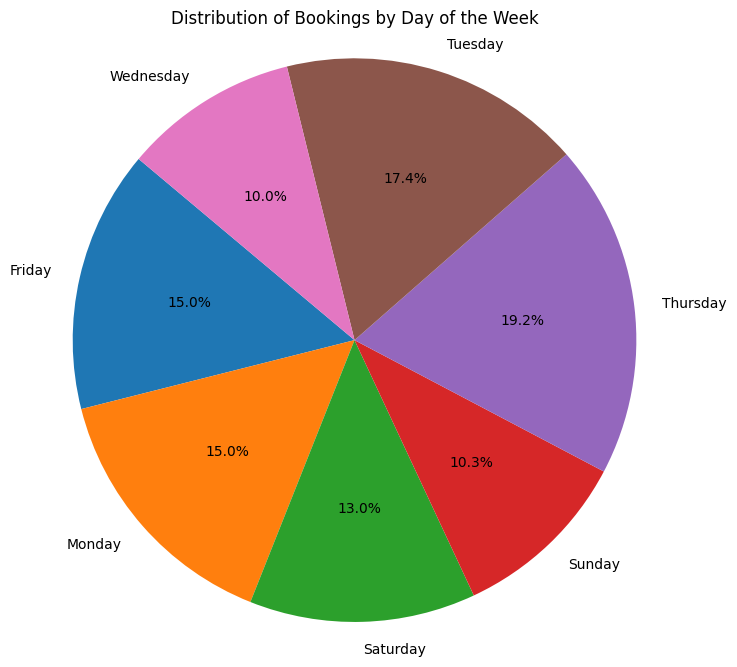

In [ ]:
#Which days of the week have the highest number of bookings?
# Also, draw a pie chart to show the distribution for all days of the week?
import pandas as pd
import matplotlib.pyplot as plt

# Load bookings dataset
booking_df = pd.read_csv("Bookings.csv")

# Convert 'booking_time' to datetime
booking_df['booking_time'] = pd.to_datetime(booking_df['booking_time'])

# Extract day of the week (e.g., Monday, Tuesday)
booking_df['booking_day'] = booking_df['booking_time'].dt.day_name()

# Count bookings per day
day_counts = booking_df['booking_day'].value_counts().sort_index()  # sort for consistent pie chart order

# Display the most frequent booking day(s)
most_bookings_day = day_counts.idxmax()
print(f"Day with the highest number of bookings: {most_bookings_day}")
print(day_counts)

#plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


Q.4  For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [ ]:
# Step 2: Group the data by service name
grouped_data = df_bookings.groupby('service_name')

# Step 3: Get total number of bookings for each service
total_bookings = grouped_data['booking_id'].count()

# Step 4: Get total Gross Booking Value (INR) for each service
total_gbv = grouped_data['INR_Amount'].sum()

# Step 5: Combine both results into a summary DataFrame
summary = pd.DataFrame({
    'Total Bookings': total_bookings,
    'Total Gross Booking Value (INR)': total_gbv
})

# Step 6: Display the result
print(summary)

              Total Bookings  Total Gross Booking Value (INR)
service_name                                                 
GOIBIBO                  186                       5897637.97
MMT                       48                        665669.08
YATRA                    105                       3378702.13


Q. 5 For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?

In [ ]:
#For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df_bookings = pd.read_csv('Bookings.csv')

# Step 2: Group by customer_id and count booking_ids
customer_booking_counts = df_bookings.groupby('customer_id')['booking_id'].count()

# Step 3: Filter customers who have more than 1 booking
multi_booking_customers = customer_booking_counts[customer_booking_counts > 1].index

# Step 4: Filter the main data to include only these customers
multi_booking_data = df_bookings[df_bookings['customer_id'].isin(multi_booking_customers)]

# Step 5: Create a new 'route' column
multi_booking_data = multi_booking_data.copy()
multi_booking_data['route'] = multi_booking_data['from_city'] + " ➔ " + multi_booking_data['to_city']

# Step 6: Group by 'route' and count how many times each route was booked
route_counts = multi_booking_data.groupby('route')['booking_id'].count()

# Step 7: Find the route with the maximum bookings
most_common_route = route_counts.idxmax()
most_common_route_count = route_counts.max()

# Step 8: Display the result
print(f"The most booked route among customers with multiple bookings is: {most_common_route}")
print(f"Number of times this route was booked: {most_common_route_count}")

The most booked route among customers with multiple bookings is: Gurgaon ➔ Roissy-en-France
Number of times this route was booked: 5


Q. 6 Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?

In [ ]:
import pandas as pd

# Step 1: Load the data
data = pd.read_csv("Bookings.csv")  # Replace with your filename

# Step 2: Group by 'from_city'
city_group = data.groupby('from_city')

# Step 3: For each city, calculate:
# - total departures (count of bookings)
# - average days to departure
city_stats = city_group.agg(
    total_departures=('booking_id', 'count'),
    days_to_departure=('days_to_departure', 'max')
).reset_index()

# Step 4: Filter only cities with at least 5 departures
city_stats_filtered = city_stats[city_stats['total_departures'] >= 5]

# Step 5: Sort by highest average days to departure
top_cities = city_stats_filtered.sort_values(by='days_to_departure', ascending=False)

# Step 6: Display the top 3 cities
print("Top 3 departure cities where customers book mostly in advance:")
print(top_cities.head(3))

Top 3 departure cities where customers book mostly in advance:
     from_city  total_departures  days_to_departure
16     Gurgaon               136              311.0
11  Devanhalli                24              226.0
27      Mumbai                34              218.0


Q.7 Plot a heatmap displaying correlations of the numerical column and report which
pair of numerical columns in the bookings data set, have the maximum correlation?

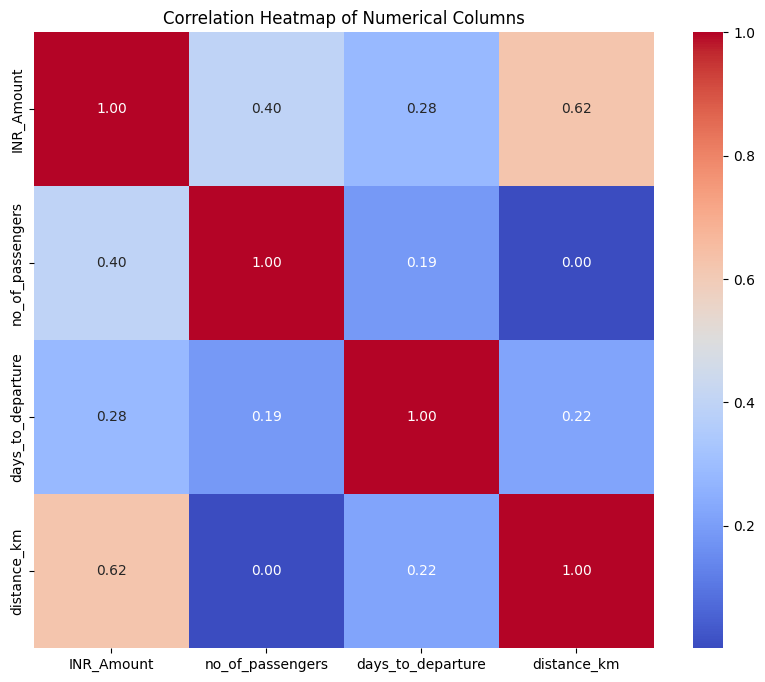

The pair of columns with the maximum correlation is: ('INR_Amount', 'distance_km')
The correlation value is: 0.62


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the data
data = pd.read_csv("Bookings.csv")  # Replace with your filename

# Step 2: Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Step 3: Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Step 5: Find the pair with maximum correlation (excluding self-correlation)
# Stack the correlation matrix and reset the index
correlation_pairs = correlation_matrix.where(~np.eye(correlation_matrix.shape[0],dtype=bool)).stack()

# Find the pair with the maximum correlation
max_corr_pair = correlation_pairs.idxmax()
max_corr_value = correlation_pairs.max()

# Step 6: Display the result
print(f"The pair of columns with the maximum correlation is: {max_corr_pair}")
print(f"The correlation value is: {max_corr_value:.2f}")

Q.8 For each service, which is the most used device type for making bookings on the
platform?


In [ ]:
# For each service, which is the most used device type for making bookings on the platform?
import pandas as pd
df_bookings = pd.read_csv('Bookings.csv')

service_device_counts = df_bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')
most_used_devices = service_device_counts.loc[service_device_counts.groupby('service_name')['count'].idxmax()]

print("\n Most used device type for each service:")
print(most_used_devices[['service_name', 'device_type_used', 'count']])


 Most used device type for each service:
  service_name device_type_used  count
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


Q.9 Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the
number of bookings performed by each device type.

<ipython-input-7-84a9e215e6a7>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')


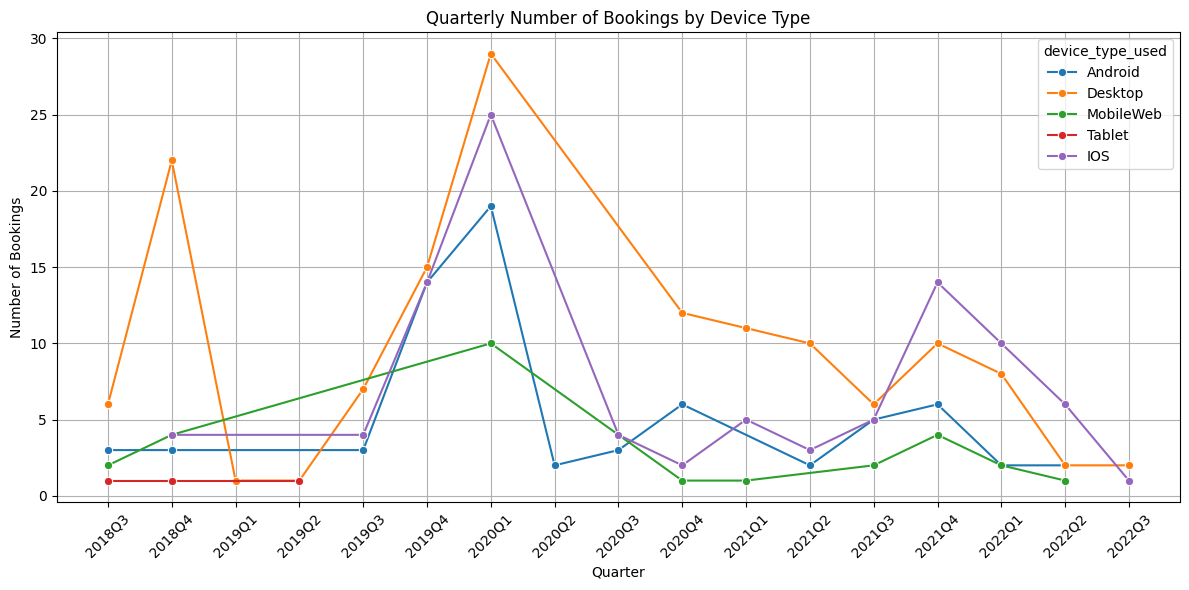

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Bookings data
bookings = pd.read_csv('Bookings.csv', parse_dates=['booking_time'])

# Extract year and quarter from booking_time
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')

# Group by quarter and device type, then count bookings
quarterly_bookings = bookings.groupby(['quarter', 'device_type_used']).size().reset_index(name='num_bookings')

# Sort quarters for correct time sequence
quarterly_bookings['quarter'] = quarterly_bookings['quarter'].astype(str)
quarterly_bookings = quarterly_bookings.sort_values('quarter')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_bookings, x='quarter', y='num_bookings', hue='device_type_used', marker='o')
plt.title('Quarterly Number of Bookings by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Q.10 Consider the following example:
12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.
Searches = 100 bookings = 10 customers = 12
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
information/context, answer the following:
• What is the average oBSR for each month of the year?
• What is the average oBSR for each day of the week?
• Plot a time series of oBSR on all the given dates.

<ipython-input-20-a80589e2023e>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly, x='month', y='oBSR', palette='Blues_d', legend=False)


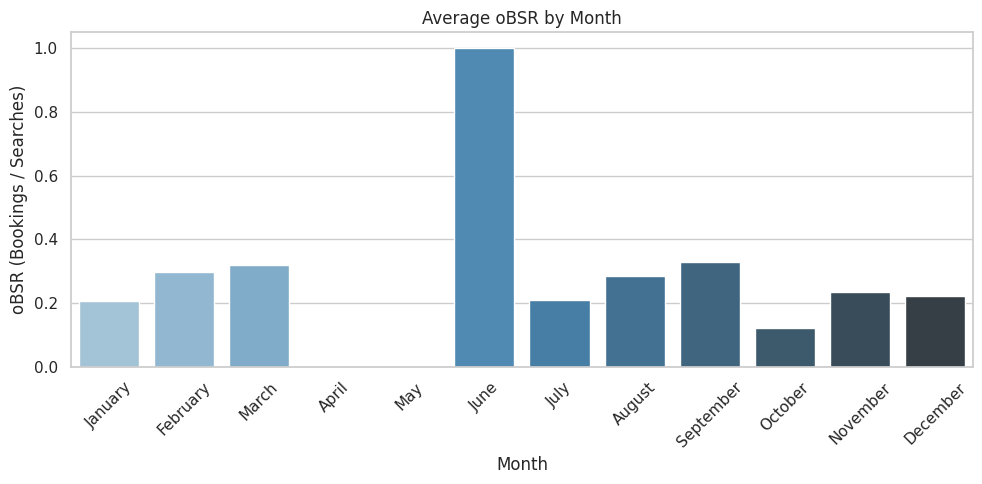

<ipython-input-20-a80589e2023e>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dow, x='day_of_week', y='oBSR', palette='Greens_d', legend=False)


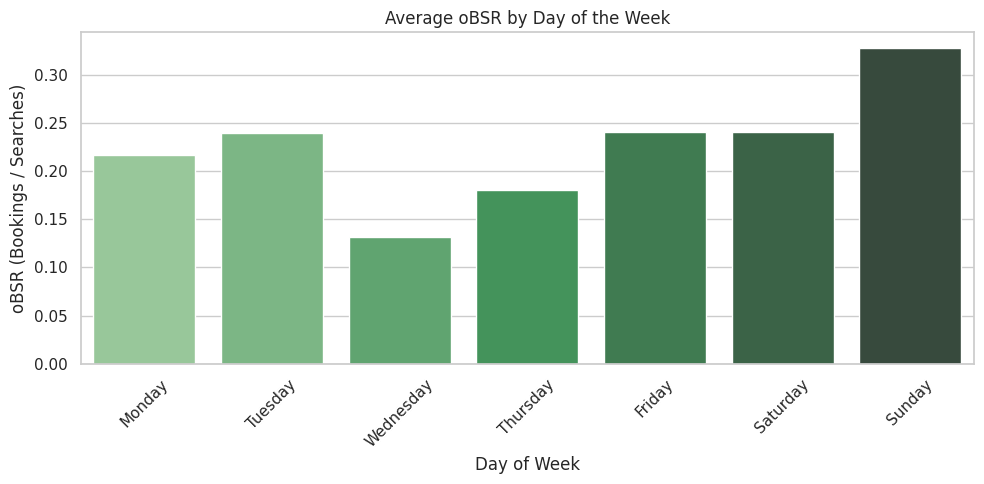

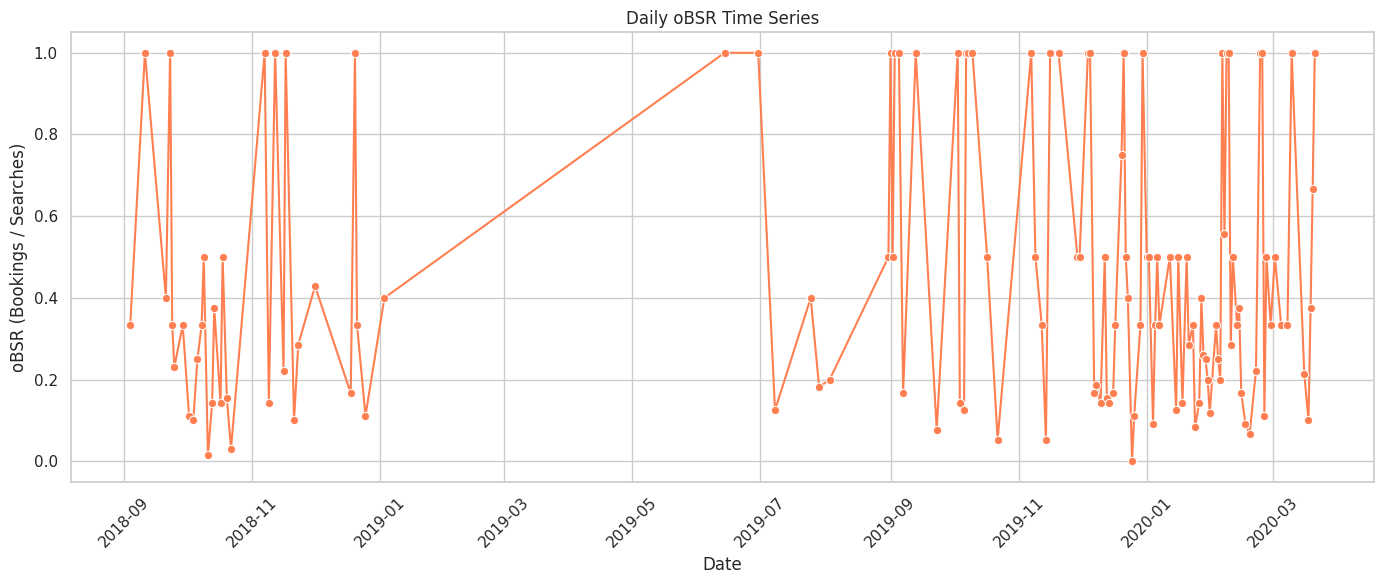

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# -------------------------------
# Step 1: Load and Clean Data
# -------------------------------
# Load sessions data
sessions = pd.read_csv('Sessions.csv')

# Convert search_time to datetime
sessions['search_time'] = pd.to_datetime(sessions['search_time'], errors='coerce')

# Drop rows where search_time is missing or invalid
sessions = sessions.dropna(subset=['search_time'])

# -------------------------------
# Step 2: Create Time Columns
# -------------------------------
sessions['month'] = sessions['search_time'].dt.month_name()
sessions['day_of_week'] = sessions['search_time'].dt.day_name()
sessions['date'] = sessions['search_time'].dt.date

# -------------------------------
# Step 3: oBSR by Month
# -------------------------------
monthly = sessions.groupby('month').agg(
    total_searches=('search_id', 'count'),
    total_bookings=('booking_id', lambda x: x.notnull().sum())
).reset_index()

monthly['oBSR'] = monthly['total_bookings'] / monthly['total_searches']

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['month'] = pd.Categorical(monthly['month'], categories=month_order, ordered=True)
monthly = monthly.sort_values('month')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly, x='month', y='oBSR', palette='Blues_d', legend=False)
plt.title('Average oBSR by Month')
plt.xticks(rotation=45)
plt.ylabel('oBSR (Bookings / Searches)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# -------------------------------
# Step 4: oBSR by Day of Week
# -------------------------------
dow = sessions.groupby('day_of_week').agg(
    total_searches=('search_id', 'count'),
    total_bookings=('booking_id', lambda x: x.notnull().sum())
).reset_index()

dow['oBSR'] = dow['total_bookings'] / dow['total_searches']

# Sort days in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow['day_of_week'] = pd.Categorical(dow['day_of_week'], categories=day_order, ordered=True)
dow = dow.sort_values('day_of_week')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=dow, x='day_of_week', y='oBSR', palette='Greens_d', legend=False)
plt.title('Average oBSR by Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('oBSR (Bookings / Searches)')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

# -------------------------------
# Step 5: oBSR Time Series (Daily)
# -------------------------------
daily = sessions.groupby('date').agg(
    total_searches=('search_id', 'count'),
    total_bookings=('booking_id', lambda x: x.notnull().sum())
).reset_index()

daily['oBSR'] = daily['total_bookings'] / daily['total_searches']

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily, x='date', y='oBSR', marker='o', color='coral')
plt.title('Daily oBSR Time Series')
plt.xlabel('Date')
plt.ylabel('oBSR (Bookings / Searches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()